In [1]:
 import torch
import matplotlib.pyplot as plt

import numpy as np
import cv2
import os

import pandas as pd

In [8]:
import torchvision

print(torchvision.__version__)
print(torch.__version__)

0.11.2+cu113
1.10.1+cpu


In [7]:
!python -m pip install torchvision=0.11.2


[notice] A new release of pip available: 22.1.2 -> 22.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


ERROR: Invalid requirement: 'torchvision=0.11.2'
Hint: = is not a valid operator. Did you mean == ?


In [3]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5n')
model.conf = 0.35
model.amp = True

Using cache found in C:\Users\User/.cache\torch\hub\ultralytics_yolov5_master
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...
requirements: Command 'pip install "PyYAML>=5.3.1" ' returned non-zero exit status 1.
YOLOv5  2022-8-3 Python-3.7.0 torch-1.10.1+cpu CPU

Fusing layers... 
YOLOv5n summary: 213 layers, 1867405 parameters, 0 gradients, 4.5 GFLOPs
Adding AutoShape... 


In [4]:
img = 'https://assets.weforum.org/article/image/large__ju_jiQgUhNmA7API0Oh-cAxz4asL6RteSi8VrOUiYM.jpg'  # or file, Path, PIL, OpenCV, numpy, list
results = model(img)
results.print()  # or .show(), .save(), .crop(), .pandas(), etc.

RuntimeError: Couldn't load custom C++ ops. This can happen if your PyTorch and torchvision versions are incompatible, or if you had errors while compiling torchvision from source. For further information on the compatible versions, check https://github.com/pytorch/vision#installation for the compatibility matrix. Please check your PyTorch version with torch.__version__ and your torchvision version with torchvision.__version__ and verify if they are compatible, and if not please reinstall torchvision so that it matches your PyTorch install.

In [ ]:
results.render()[0].shape

In [ ]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(16, 6))
ax.imshow(results.render()[0])

In [ ]:
import PIL
import urllib
%matplotlib inline

plt.figure(figsize=(16, 6))
plt.imshow(PIL.Image.open(urllib.request.urlopen(img)))

In [ ]:
"""
#cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture('tesla.mp4')
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
"""

# Public Datasets

In [ ]:
!git clone https://github.com/ultralytics/yolov5
!python3 -m pip install -r yolov5/requirements.txt

In [ ]:
!python3 -m pip install opencv-python-headless roboflow

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="LTOMlcYHj1Jefjve8EY4")
project = rf.workspace("test-cnn").project("trafficsignals-zgvyv")
dataset = project.version(4).download("yolov5")

In [ ]:
dataset

In [ ]:
dataset.location

In [ ]:
%cat {dataset.location}/data.yaml

In [ ]:
import yaml
config = {'path': dataset.location, # root dir
         'train': 'train/images', # relative to path
         'val': 'valid/images',
         'nc': 1,
         'names': ['signal']}
 
with open(os.path.join(dataset.location, "data.yaml"), "w") as file:
    yaml.dump(config, file, default_flow_style=False)

In [ ]:
%cat {dataset.location}/data.yaml

In [ ]:
%cd yolov5
!python3 train.py --batch -1 --epochs 10 --data {dataset.location}/data.yaml --weights yolov5m.pt

# Custom Data Collection and Preparation

In [ ]:
%cd ..

/content


In [ ]:
IMAGES_PATH = os.path.join('drive-data', 'images') #/data/images
LABELS_PATH = os.path.join('drive-data', 'labels') #/data/labels

labels = ['crossing', 'parking', 'wrong way', 'no vehicles', 'traffic light']

classnames = {
    'crossing' : 0, 
    'parking' : 1, 
    'wrong way' : 2, 
    'no vehicles' : 3, 
    'traffic light' : 4
    
}

In [ ]:
# Windows
#!mkdir yolov5\yolov5-data
#!mkdir yolov5\yolov5-data\temp
#!mkdir yolov5\yolov5-data\images\train
#!mkdir yolov5\yolov5-data\images\test
#!mkdir yolov5\yolov5-data\images\valid

#!mkdir yolov5\yolov5-data\labels\train
#!mkdir yolov5\yolov5-data\labels\test
#!mkdir yolov5\yolov5-data\labels\valid


# Linux and MacOS
!mkdir drive-data
!mkdir drive-data/images
!mkdir drive-data/labels

!mkdir drive-data/images/train
!mkdir drive-data/images/test
!mkdir drive-data/images/valid

!mkdir drive-data/labels/train
!mkdir drive-data/labels/test
!mkdir drive-data/labels/valid

mkdir: cannot create directory ‘drive-data’: File exists
mkdir: cannot create directory ‘drive-data/images’: File exists
mkdir: cannot create directory ‘drive-data/labels’: File exists
mkdir: cannot create directory ‘drive-data/images/train’: File exists
mkdir: cannot create directory ‘drive-data/images/test’: File exists
mkdir: cannot create directory ‘drive-data/images/valid’: File exists
mkdir: cannot create directory ‘drive-data/labels/train’: File exists
mkdir: cannot create directory ‘drive-data/labels/test’: File exists
mkdir: cannot create directory ‘drive-data/labels/valid’: File exists


In [ ]:
def save_labels_as_classfile():
    # Where LabelImg will store labels
    with open(f'{LABELS_PATH}/classes.txt', 'w+') as f:
        for label in labels:
            f.write(f'{label}\n')

In [ ]:
save_labels_as_classfile()

In [ ]:
# To collect images from, say, the webcam
"""
import time

cap = cv2.VideoCapture(0)
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    for img_num in range(10):
        print(f"Collecting images for label '{label}', image number {img_num}")
        ret, frame = cap.read()        
        imgname = os.path.join(IMAGES_PATH, f"{label}-{img_num}.jpg")
        cv2.imwrite(imgname, frame)
        cv2.imshow('Image Collection', frame)
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)
"""

'\nimport time\n\ncap = cv2.VideoCapture(0)\nfor label in labels:\n    print(\'Collecting images for {}\'.format(label))\n    time.sleep(5)\n    \n    for img_num in range(10):\n        print(f"Collecting images for label \'{label}\', image number {img_num}")\n        ret, frame = cap.read()        \n        imgname = os.path.join(IMAGES_PATH, f"{label}-{img_num}.jpg")\n        cv2.imwrite(imgname, frame)\n        cv2.imshow(\'Image Collection\', frame)\n        time.sleep(2)\n        \n        if cv2.waitKey(10) & 0xFF == ord(\'q\'):\n            break\ncap.release()\ncv2.destroyAllWindows()\ncv2.waitKey(1)\n'

In [ ]:
import cv2
video_path = 'madrid_drive.mp4'

# Path, take every 30th frame (1s), 
def video_to_frames(path, sampling_rate=30, verbose=True):
    cap = cv2.VideoCapture(path)
    # Get FPS, frame count, and calc duration
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    duration = int(frame_count/fps)

    ret, frame = cap.read()
    img_num = 0
    failed = []
    if verbose:
        print(f'Processing video {video_path}... \nFPS: {fps}. \nFrame Count: {frame_count} \nDuration: {duration}s \nSampling rate: {sampling_rate}')
    for img_num in range(frame_count+1):
        ret, frame = cap.read()
        if img_num%30==0:
            if ret:
                imgname = os.path.join(IMAGES_PATH, f"{int(img_num/sampling_rate)}.jpg")
                cv2.imwrite(imgname, frame)    
                if verbose:
                    print(f'Processed frame {int(img_num/sampling_rate)}/{duration}', end='\r')
            else:
                failed.append(int(img_num/sampling_rate))
        img_num += 1
    if verbose:
        print(f'Failed to process frames: {failed}')
    print('Processing done.')

    return int(img_num/sampling_rate)-len(failed)
        
img_num = video_to_frames(video_path)

Processing video madrid_drive.mp4... 
FPS: 29.97002997002997. 
Frame Count: 4498 
Duration: 150s 
Sampling rate: 30
Failed to process frames: [147, 148, 149]
Processing done.


In [ ]:
"""
Roboflow - Recommended by Ultralytics, web-based, but requires sign in and public workspaces for free (paid private)
LabelImg - Desktop-based, simple, intuitive, buy finicky and bug-prone, doesn't work with python >3.9
Label Studio - Web-based
"""

"\nRoboflow - Recommended by Ultralytics, web-based, but requires sign in and public workspaces for free (paid private)\nLabelImg - Desktop-based, simple, intuitive, buy finicky and bug-prone, doesn't work with python >3.9\nLabel Studio - Web-based\n"

In [ ]:
# ! labelimg

In [ ]:
image_text_mapping = {}

for label in labels:
    for n in range(img_num):
        imgname = os.path.join(IMAGES_PATH, f"{n}.jpg")
        textname = os.path.join(LABELS_PATH, f"{n}.txt")
        image_text_mapping[imgname] = textname
    

In [ ]:
df = pd.DataFrame(image_text_mapping.items(), columns=['Img Path', 'Text Path'])
df.head(10)

,Img Path,Text Path
0,drive-data/images/0.jpg,drive-data/labels/0.txt
1,drive-data/images/1.jpg,drive-data/labels/1.txt
2,drive-data/images/2.jpg,drive-data/labels/2.txt
3,drive-data/images/3.jpg,drive-data/labels/3.txt
4,drive-data/images/4.jpg,drive-data/labels/4.txt
5,drive-data/images/5.jpg,drive-data/labels/5.txt
6,drive-data/images/6.jpg,drive-data/labels/6.txt
7,drive-data/images/7.jpg,drive-data/labels/7.txt
8,drive-data/images/8.jpg,drive-data/labels/8.txt
9,drive-data/images/9.jpg,drive-data/labels/9.txt


In [ ]:
df.shape

(146, 2)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, train_size=0.8)
train_df, valid_df = train_test_split(train_df, train_size=0.9)

In [ ]:
train_df.shape

(104, 2)

In [ ]:
test_df.shape

(30, 2)

In [ ]:
valid_df.shape

(12, 2)

In [ ]:
import shutil

def df_to_dir(df, set_name):
    for index, row in df.iterrows():
      if os.path.exists(row['Img Path']):
           img_name = os.path.split(row['Img Path'])[1]
           shutil.copyfile(row['Img Path'], os.path.join(IMAGES_PATH, set_name, img_name))
           os.remove(row['Img Path'])
      if os.path.exists(row['Text Path']):
          txt_name = os.path.split(row['Text Path'])[1]
          shutil.copyfile(row['Text Path'], os.path.join(LABELS_PATH, set_name, txt_name))
          os.remove(row['Text Path'])
          

In [ ]:
df_to_dir(train_df, 'train')
df_to_dir(test_df, 'test')
df_to_dir(valid_df, 'valid')

# Train Model

In [ ]:
path = os.getcwd()

In [ ]:
%cd yolov5

/content/yolov5


In [ ]:
path

'/content'

In [ ]:
import yaml
config = {'path': os.path.join(path, 'drive-data'), # root dir
         'train': 'images/train', # relative to path
         'test': 'images/test',
         'val': 'images/valid',
         'nc': len(labels),
         'names': labels}
 
with open("data.yaml", "w") as file:
    yaml.dump(config, file, default_flow_style=False)

In [ ]:
! python3 train.py --batch -1 --epochs 100 --data data.yaml --weights runs/train/exp2/weights/best.pt

train: weights=runs/train/exp2/weights/best.pt, cfg=, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=-1, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (Docker image), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 v6.1-344-g0e165c5 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, 

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train/exp4/weights/best.pt')

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2022-7-31 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 290 layers, 20869098 parameters, 0 gradients, 47.9 GFLOPs
Adding AutoShape... 


In [ ]:
% cd ..

/content


In [ ]:
path = os.path.join(IMAGES_PATH, 'test', '100.jpg')

In [ ]:
results = model(path)

In [ ]:
results.print()

image 1/1: 720x1280 2 crossings
Speed: 26.3ms pre-process, 22.6ms inference, 1.6ms NMS per image at shape (1, 3, 384, 640)


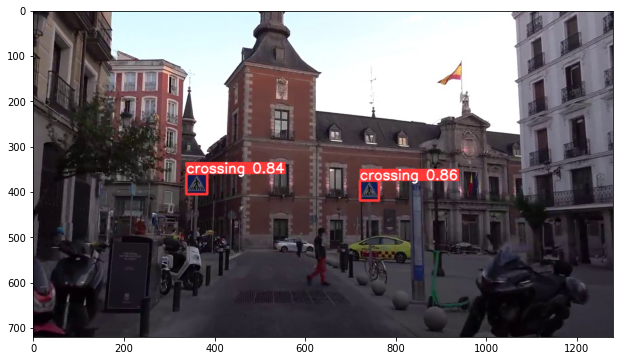

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(16, 6))
ax.imshow(results.render()[0])